# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid", {'axes.grid' : True})


In [2]:
df = pd.read_csv("loan.csv", encoding="UTF-8", dtype={'next_pymnt_d': object})
pd.set_option('display.max_columns', 150)

# Data-Cleanup

### Checking shape, info, describe, nulls

In [3]:
df.shape

(39717, 111)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
round( df.isnull().sum() / len(df) * 100, 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Dropping cols where all 100% values are null

In [7]:
df.dropna(axis=1, how='all', inplace=True)

### describe() function tells some cols have only one type of values, droping these cols

In [8]:
cols = list(df)
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index

In [9]:
cols_to_drop

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [10]:
df.drop(columns=cols_to_drop, inplace=True)

##### Dropping few text cols since we are not doing any NLP/NLU analysis
##### zip_code removed because we have states
##### desc removed because we have reasons

In [11]:
df.drop(columns=['url', 'emp_title', 'title', 'zip_code', 'desc'], inplace=True)

In [12]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,NaN,NaN,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,NaN,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35,0,Jan-07,2,NaN,NaN,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55,0,Apr-04,2,NaN,NaN,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,NaN,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08,0,Sep-04,0,NaN,NaN,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,NaN,Mar-13,0.0


#### Fixing % and months in few cols

In [13]:
df.term = df.term.str.replace("months", "").astype(int)
df.int_rate = df.int_rate.str.replace("%", "").astype(float)
df.revol_util = df.revol_util.str.replace("%", "").astype(float)

#### Analysing emp_length processing & cleaning

In [14]:
df.emp_length.describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [15]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

#### regex to replace year/years with empty, less than 1 with 0, 10+ with 10

In [16]:
df['emp_length']=df.emp_length.str.replace(r'years*', "", regex=True).str.replace("< 1", "0").str.replace(r'10\+', "10", regex=True).astype(float)

In [17]:
df.emp_length.describe()

count    38642.000000
mean         4.973449
std          3.562580
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

#### replacing emp_length with median values, ie. 50% of describe() function

In [18]:
df.emp_length.fillna(df.emp_length.median(), inplace=True)

In [19]:
df.emp_length.describe()

count    39717.000000
mean         4.947101
std          3.517584
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

#### Analysing revol_util for processing & cleaning

In [20]:
df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [21]:
df.revol_util.fillna(df.revol_util.mean(), inplace=True)

#### Analysing pub_rec_bankruptcies for processing & cleaning

In [22]:
df.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [23]:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

#### replacing pub_rec_bankruptcies missing values with highest occuring value

In [24]:
df.pub_rec_bankruptcies.fillna(0.0, inplace=True)

#### Cleaning dates: changing formats from Jan-15 to 2015/01

In [25]:
month_dict = {"Jan":'01', "Feb":'02', "Mar":'03', "Apr":'04', 
              "May":'05', "Jun":'06', "Jul":'07', "Aug":'08', 
              "Sep":'09', "Oct":'10', "Nov":'11', "Dec":'12', }

In [26]:
def fixdate(d):
    if type(d) is str:
        d=d.split("-")
        d = "20" + d[1] + "/" + month_dict[d[0]]
        return d
    return float('NaN')

In [27]:
df.last_pymnt_d=df.last_pymnt_d.apply(lambda x: fixdate(x))
df.next_pymnt_d=df.next_pymnt_d.apply(lambda x: fixdate(x))
df.last_credit_pull_d=df.last_credit_pull_d.apply(lambda x: fixdate(x))


In [28]:
df.verification_status = df.verification_status.apply(lambda x: 'Verified' if x == 'Source Verified' else x)

In [29]:
df.drop(columns=['id', 'member_id'], inplace=True)

#### rechecking nulls

In [30]:
round( df.isnull().sum() / len(df) * 100, 2)

loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_length                  0.00
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
purpose                     0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
mths_since_last_record     92.99
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.00
total_acc                   0.00
out_prncp                   0.00
out_prncp_inv               0.00
total_pymnt                 0.00
total_pymn

#### removing high nulls columns

In [31]:
cols_high_nulls = ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']
df.drop(columns=cols_high_nulls, inplace=True)

## Analysis begin

#### Dropping behavioural data because these variables comes into picture after the loan is sanctioned

In [32]:
behavioural_cols= [ 
    "delinq_2yrs", "earliest_cr_line", "inq_last_6mths",
    "open_acc", "pub_rec", "revol_bal", "revol_util",
    "total_acc", "out_prncp", "out_prncp_inv", "total_pymnt",
    "total_pymnt_inv", "total_rec_prncp", "total_rec_int",
    "total_rec_late_fee", "recoveries", "collection_recovery_fee",
    "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d"
]
df.drop(columns=behavioural_cols, inplace=True)

In [33]:
df.shape

(39717, 18)

In [34]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

### Categorical Variables
- term (Ordered)
- emp_length (Ordered)
- issue_d (Ordered)
- grade (Ordered)
- sub_grade (Ordered)
- home_ownership (Unordered)
- purpose (Unordered)
- verification_status (Unordered)
- addr_state (Unordered)

### Quatitative Variables
- loan_amnt
- funded_amnt
- funded_amnt_inv
- int_rate 
- installment
- annual_inc
- dti
- pub_rec_bankruptcies

### Using applications for which loan is either Fully Paid or Charged Off.

In [35]:
dataset=df[df['loan_status']!='Current']

In [36]:
dataset.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.0,RENT,30000.0,Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8.0,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0.0
7,3000,3000,3000.0,36,18.64,109.43,E,E1,9.0,RENT,48000.0,Verified,Dec-11,Fully Paid,car,CA,5.35,0.0
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4.0,OWN,40000.0,Verified,Dec-11,Charged Off,small_business,CA,5.55,0.0
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0.0,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08,0.0
10,6500,6500,6500.0,60,14.65,153.45,C,C3,5.0,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0.0


In [37]:
round( df.isnull().sum() / len(df) * 100, 2)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

## Unordered Categorical Variables - Univariate Analysis

Doing analysis for `verification_status`

In [38]:
percent_verification_status = dataset.groupby('loan_status')['verification_status'].value_counts(ascending=False).unstack(level=0).reset_index()
percent_verification_status['Total'] = percent_verification_status['Charged Off'] + percent_verification_status['Fully Paid']
percent_verification_status['Charged_Off_Percent'] = percent_verification_status['Charged Off'] * 100 /percent_verification_status['Total']
percent_verification_status['Fully_Paid_Percent'] = percent_verification_status['Fully Paid'] * 100 /percent_verification_status['Total']
percent_verification_status.sort_values(by='Charged_Off_Percent', ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
1,Verified,3485,18398,21883,15.925604,84.074396
0,Not Verified,2142,14552,16694,12.830957,87.169043


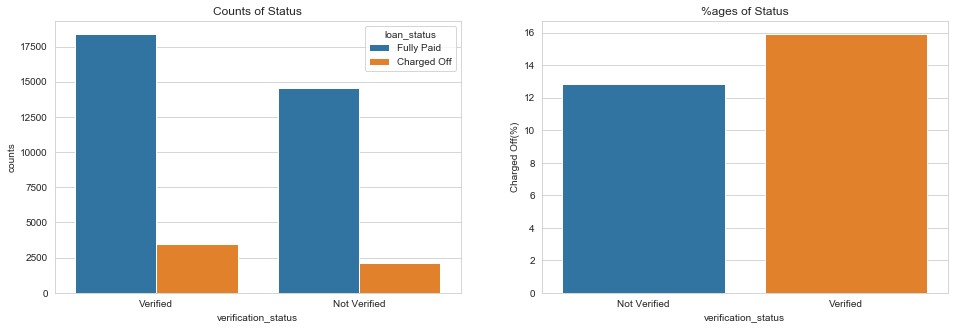

In [39]:
fig = plt.figure(figsize=(16, 5), )

plt.subplot(1, 2, 1)
ax=sns.countplot(x="verification_status", hue="loan_status", data=dataset)
plt.title("Counts of Status")
ax.set(xlabel='verification_status', ylabel='counts')

plt.subplot(1, 2, 2)
ax=sns.barplot(x="verification_status", y="Charged_Off_Percent", data=percent_verification_status)
plt.title("%ages of Status")
ax.set(xlabel='verification_status', ylabel='Charged Off(%)')


plt.show()

___Conclusion:___
- There is no significant information available from verification_status

Doing analysis for `home_ownership`

In [40]:
home_ownership_status = dataset.groupby('loan_status')['home_ownership'].value_counts(ascending=False).unstack(level=0).reset_index()
home_ownership_status.fillna(0, inplace=True)
home_ownership_status['Total'] = home_ownership_status['Charged Off'] + home_ownership_status['Fully Paid']
home_ownership_status['Charged_Off_Percent'] = home_ownership_status['Charged Off'] * 100 /home_ownership_status['Total']
home_ownership_status['Fully_Paid_Percent'] = home_ownership_status['Fully Paid'] * 100 /home_ownership_status['Total']
home_ownership_status.sort_values(by='Charged_Off_Percent', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
2,OTHER,18.0,80.0,98.0,18.367347,81.632653
4,RENT,2839.0,15641.0,18480.0,15.362554,84.637446
3,OWN,443.0,2532.0,2975.0,14.890756,85.109244
0,MORTGAGE,2327.0,14694.0,17021.0,13.671347,86.328653
1,NONE,0.0,3.0,3.0,0.000000,100.000000


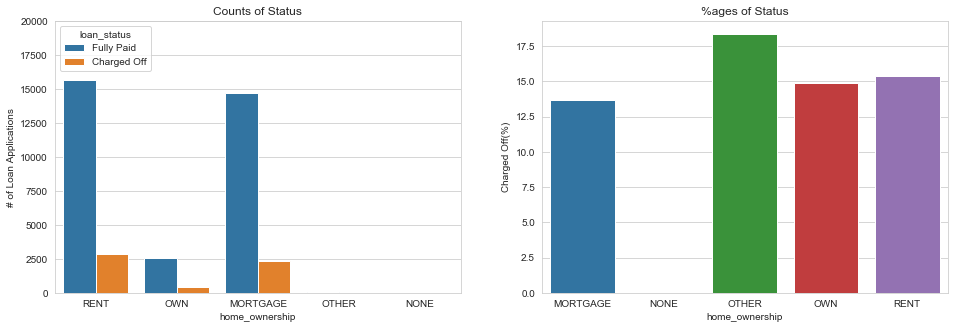

In [41]:
fig = plt.figure(figsize=(16, 5), )

plt.subplot(1, 2, 1)
ax=sns.countplot(x="home_ownership", hue="loan_status", data=dataset)
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")
plt.ylim(0, 20000)

plt.subplot(1, 2, 2)
ax=sns.barplot(x="home_ownership", y="Charged_Off_Percent", data=home_ownership_status)
plt.title("%ages of Status")
ax.set(xlabel='home_ownership', ylabel='Charged Off(%)')

plt.show()


___Conclusion:___
- There is no significant information available from home_ownership
- The count of people with `Rent & Mortgage` has more defaults but the pecentage of defaults is higher for `OTHER`

Doing analysis for `purpose`

In [42]:
purpose_status = dataset.groupby('loan_status')['purpose'].value_counts(ascending=False).unstack(level=0).reset_index()
purpose_status.fillna(0, inplace=True)
purpose_status['Total'] = purpose_status['Charged Off'] + purpose_status['Fully Paid']
purpose_status['Charged_Off_Percent'] = purpose_status['Charged Off'] * 100 /purpose_status['Total']
purpose_status['Fully_Paid_Percent'] = purpose_status['Fully Paid'] * 100 /purpose_status['Total']
purpose_status.sort_values(by='Charged_Off_Percent', ascending=False)


loan_status,purpose,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
11,small_business,475,1279,1754,27.080958,72.919042
10,renewable_energy,19,83,102,18.627451,81.372549
3,educational,56,269,325,17.230769,82.769231
9,other,633,3232,3865,16.377749,83.622251
5,house,59,308,367,16.076294,83.923706
8,moving,92,484,576,15.972222,84.027778
7,medical,106,575,681,15.565345,84.434655
2,debt_consolidation,2767,15288,18055,15.325395,84.674605
12,vacation,53,322,375,14.133333,85.866667
4,home_improvement,347,2528,2875,12.069565,87.930435


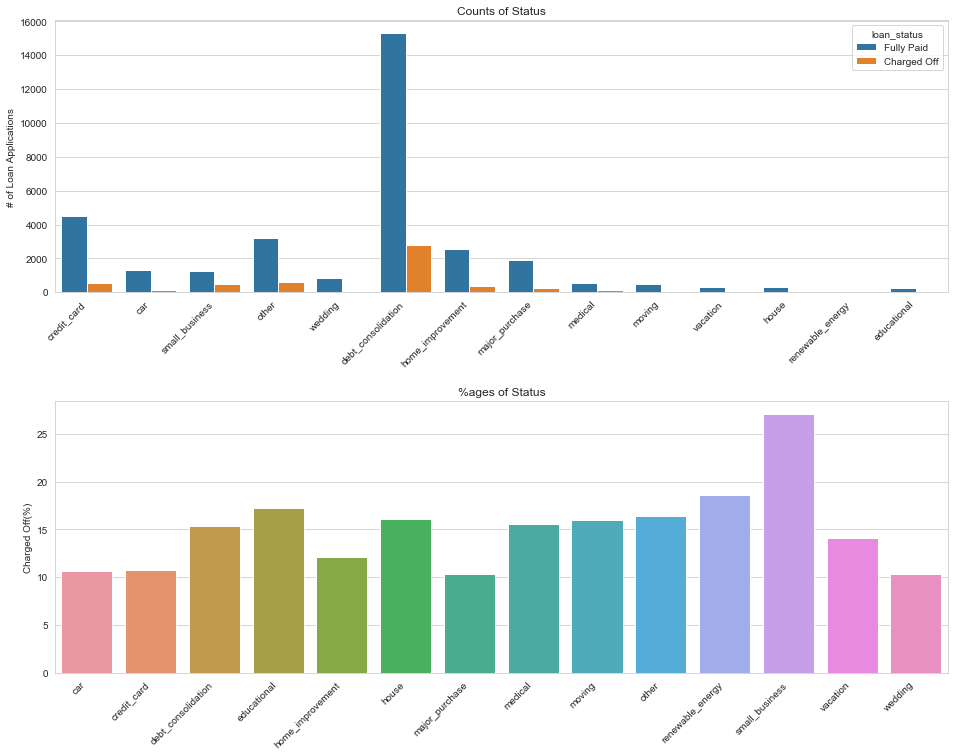

In [43]:
fig = plt.figure(figsize=(16, 12), )

plt.subplot(2, 1, 1)
ax=sns.countplot(x="purpose", hue="loan_status", data=dataset, linewidth=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")
plt.xlabel("")


plt.subplot(2, 1, 2)
ax=sns.barplot(x="purpose", y="Charged_Off_Percent", data=purpose_status)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("%ages of Status")
plt.ylabel('Charged Off(%)')
plt.xlabel("")

plt.subplots_adjust(hspace = 0.4)
plt.show()



___Conclusion:___
- There is no high defaults for `debt_consilidation` but becuase of more number of requests for this segment.
- The percentage of defaults is higher for the `small_business` segments - we need to be cautious for this segment


Doing analysis for `addr_state`

In [44]:
addr_state_status = dataset.groupby('loan_status')['addr_state'].value_counts(ascending=False).unstack(level=0).reset_index()
addr_state_status.fillna(0, inplace=True)
addr_state_status['Total'] = addr_state_status['Charged Off'] + addr_state_status['Fully Paid']
addr_state_status['Charged_Off_Percent'] = addr_state_status['Charged Off'] * 100 /addr_state_status['Total']
addr_state_status['Fully_Paid_Percent'] = addr_state_status['Fully Paid'] * 100 /addr_state_status['Total']
addr_state_status.sort_values(by='Charged_Off_Percent', ascending=False, inplace=True)
addr_state_status.head()

loan_status,addr_state,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
28,NE,3.0,2.0,5.0,60.000000,40.000000
32,NV,108.0,371.0,479.0,22.546973,77.453027
40,SD,12.0,50.0,62.0,19.354839,80.645161
0,AK,15.0,63.0,78.0,19.230769,80.769231
9,FL,504.0,2277.0,2781.0,18.122977,81.877023


In [45]:
state_freq=dataset[['loan_amnt', 'addr_state']].groupby("addr_state").count().sort_values(by="loan_amnt", ascending=False).rename(columns={'loan_amnt':'freq'})
state_freq['states']=state_freq.index

### Regions clearly shows Power law distribution using below charts

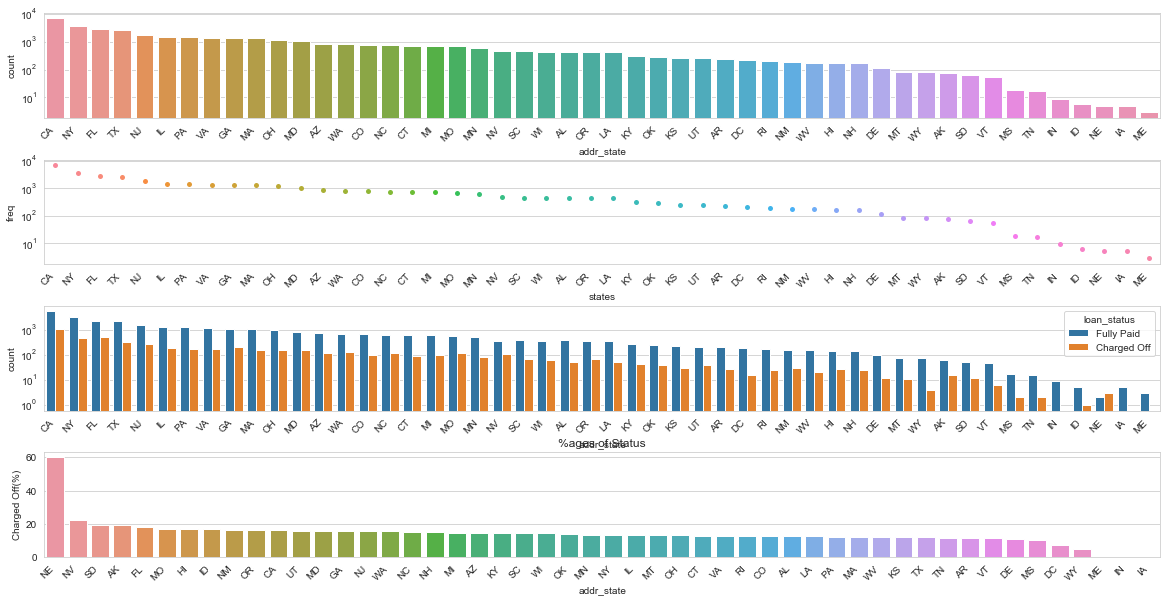

In [46]:
fig = plt.figure(figsize=(20, 10), )

plt.subplot(4, 1, 1)
plt.yscale("log")
ax=sns.countplot(x="addr_state", data=dataset, linewidth=1, order=dataset['addr_state'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


plt.subplot(4, 1, 2)
plt.yscale("log")
ax=sns.swarmplot(x='states', y='freq', data=state_freq)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.subplot(4, 1, 3)
plt.yscale("log")
ax=sns.countplot(x="addr_state", hue="loan_status", data=dataset, linewidth=1, order=dataset['addr_state'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.subplot(4, 1, 4)
ax=sns.barplot(x="addr_state", y="Charged_Off_Percent", data=addr_state_status)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("%ages of Status")
plt.ylabel('Charged Off(%)')


plt.subplots_adjust(hspace = 0.4)
plt.show()



___Conclusion:___
- Regions clearly shows Power law distribution with `CA` at highest number of applications
- The percentage of defaults is higher for the `NE`
- We need to be cautious for both `NE` and `CA`

## Ordered Categorical Variables - Univariate Analysis

Analysis for `grade` & `sub-grade`

In [47]:
grade_status = dataset.groupby('loan_status')['grade'].value_counts(ascending=False).unstack(level=0).reset_index()
grade_status.fillna(0, inplace=True)
grade_status['Total'] = grade_status['Charged Off'] + grade_status['Fully Paid']
grade_status['Charged_Off_Percent'] = grade_status['Charged Off'] * 100 /grade_status['Total']
grade_status['Fully_Paid_Percent'] = grade_status['Fully Paid'] * 100 /grade_status['Total']
grade_status.sort_values(by='Charged_Off_Percent', ascending=False, inplace=True)
grade_status

loan_status,grade,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
6,G,101,198,299,33.779264,66.220736
5,F,319,657,976,32.684426,67.315574
4,E,715,1948,2663,26.849418,73.150582
3,D,1118,3967,5085,21.986234,78.013766
2,C,1347,6487,7834,17.194281,82.805719
1,B,1425,10250,11675,12.205567,87.794433
0,A,602,9443,10045,5.993031,94.006969


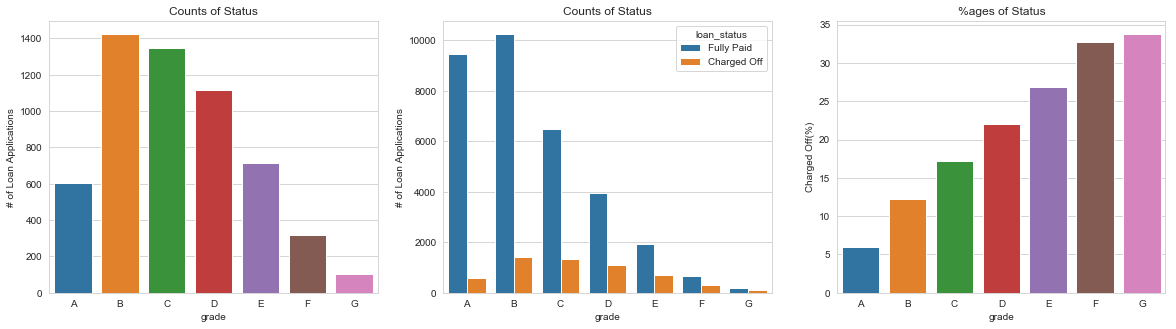

In [48]:
fig = plt.figure(figsize=(20, 5), )

plt.subplot(1, 3, 1)
ax=sns.countplot(x="grade", data=dataset[dataset.loan_status=="Charged Off"], order=['A','B','C','D','E','F','G'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")

plt.subplot(1, 3, 2)
ax=sns.countplot(x="grade", hue="loan_status", data=dataset, order=['A','B','C','D','E','F','G'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")

plt.subplot(1, 3, 3)
ax=sns.barplot(x="grade", y="Charged_Off_Percent", data=grade_status, order=['A','B','C','D','E','F','G'])
plt.title("%ages of Status")
plt.ylabel('Charged Off(%)')


plt.show()

In [49]:
sub_grade_status = dataset.groupby('loan_status')['sub_grade'].value_counts(ascending=False).unstack(level=0).reset_index()
sub_grade_status.fillna(0, inplace=True)
sub_grade_status['Total'] = sub_grade_status['Charged Off'] + sub_grade_status['Fully Paid']
sub_grade_status['Charged_Off_Percent'] = sub_grade_status['Charged Off'] * 100 /sub_grade_status['Total']
sub_grade_status['Fully_Paid_Percent'] = sub_grade_status['Fully Paid'] * 100 /sub_grade_status['Total']
sub_grade_status.sort_values(by='Charged_Off_Percent', ascending=False, inplace=True)


sub_grade_status.head()

loan_status,sub_grade,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
29,F5,54,59,113,47.787611,52.212389
32,G3,19,26,45,42.222222,57.777778
31,G2,28,49,77,36.363636,63.636364
28,F4,53,98,151,35.099338,64.900662
34,G5,10,19,29,34.482759,65.517241


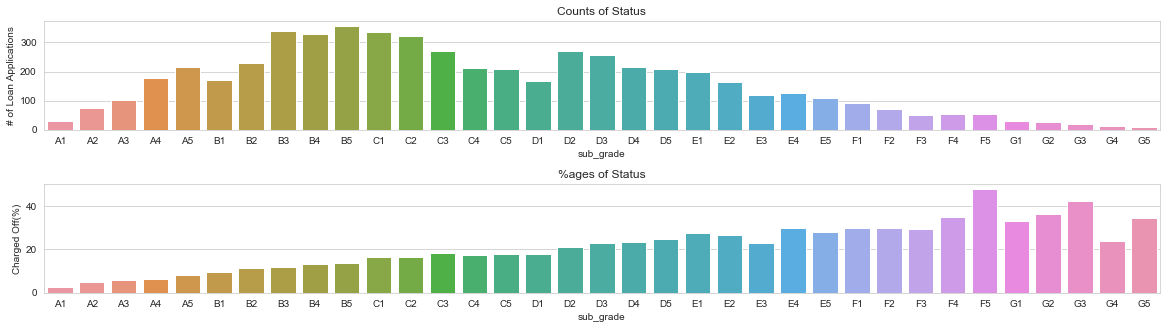

In [50]:
alphaorder=dataset['sub_grade'].unique()
alphaorder.sort()


fig = plt.figure(figsize=(20, 5), )

plt.subplot(2, 1, 1)
ax=sns.countplot(x="sub_grade", data=dataset[dataset.loan_status=="Charged Off"], order=alphaorder)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")

plt.subplot(2, 1, 2)
ax=sns.barplot(x="sub_grade", y="Charged_Off_Percent", data=sub_grade_status, order=alphaorder)
plt.title("%ages of Status")
plt.ylabel('Charged Off(%)')

plt.subplots_adjust(hspace = 0.5)


plt.show()


___Conclusion:___
- The above plots clearly states that `higher grades` & `subgrades` has higher default probablities as its directly linked to interest rates

Analysis for `emp_length`

In [51]:
emp_length_status = dataset.groupby('loan_status')['emp_length'].value_counts(ascending=False).unstack(level=0).reset_index()
emp_length_status.fillna(0, inplace=True)
emp_length_status['Total'] = emp_length_status['Charged Off'] + emp_length_status['Fully Paid']
emp_length_status['Charged_Off_Percent'] = emp_length_status['Charged Off'] * 100 /emp_length_status['Total']
emp_length_status['Fully_Paid_Percent'] = emp_length_status['Fully Paid'] * 100 /emp_length_status['Total']
emp_length_status.sort_values(by='Charged_Off_Percent', ascending=False, inplace=True)

emp_length_status

loan_status,emp_length,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
4,4.0,690,3685,4375,15.771429,84.228571
10,10.0,1331,7157,8488,15.680961,84.319039
7,7.0,263,1448,1711,15.371128,84.628872
1,1.0,456,2713,3169,14.389397,85.610603
5,5.0,458,2736,3194,14.339386,85.660614
0,0.0,639,3869,4508,14.174800,85.825200
6,6.0,307,1861,2168,14.160517,85.839483
8,8.0,203,1232,1435,14.146341,85.853659
3,3.0,555,3457,4012,13.833500,86.166500
2,2.0,567,3724,4291,13.213703,86.786297


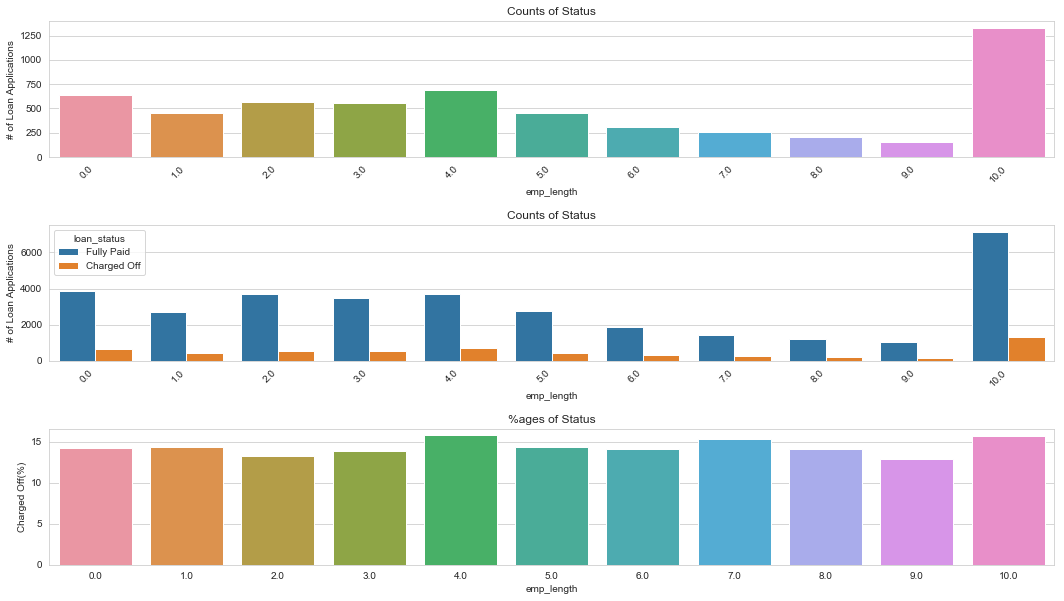

In [52]:
fig = plt.figure(figsize=(18, 10), )

plt.subplot(3, 1, 1)
ax=sns.countplot(x="emp_length", data=dataset[dataset.loan_status=="Charged Off"], linewidth=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")

plt.subplot(3, 1, 2)
ax=sns.countplot(x="emp_length", hue="loan_status", data=dataset, linewidth=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")

plt.subplot(3, 1, 3)
ax=sns.barplot(x="emp_length", y="Charged_Off_Percent", data=emp_length_status)
plt.title("%ages of Status")
plt.ylabel('Charged Off(%)')


plt.subplots_adjust(hspace = 0.5)
plt.show()


Let's now segment the emp_length into 4 segments 
- 0-3 Junior
- 3-8 MidLevel
- 8-10 Senior

In [53]:
def emp_bucket(value):
    if value in range(0, 4):
        return 'Junior'
    if value in range(4, 9):
        return "Mid"
    
    return "Senior"

dataset['emp_length_segment']=dataset.emp_length.apply(lambda x: emp_bucket(x))

/Users/arpitjoshi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
emp_length_segment_status = dataset.groupby('loan_status')['emp_length_segment'].value_counts(ascending=False).unstack(level=0).reset_index()
emp_length_segment_status.fillna(0, inplace=True)
emp_length_segment_status['Total'] = emp_length_segment_status['Charged Off'] + emp_length_segment_status['Fully Paid']
emp_length_segment_status['Charged_Off_Percent'] = emp_length_segment_status['Charged Off'] * 100 /emp_length_segment_status['Total']
emp_length_segment_status['Fully_Paid_Percent'] = emp_length_segment_status['Fully Paid'] * 100 /emp_length_segment_status['Total']
emp_length_segment_status.sort_values(by='Charged_Off_Percent', ascending=False, inplace=True)

emp_length_segment_status

loan_status,emp_length_segment,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
2,Senior,1489,8225,9714,15.328392,84.671608
1,Mid,1921,10962,12883,14.911123,85.088877
0,Junior,2217,13763,15980,13.873592,86.126408


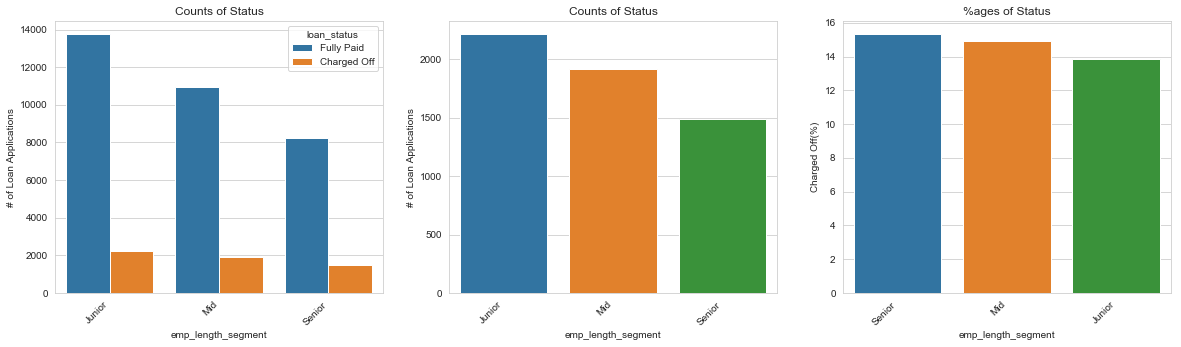

In [55]:
fig = plt.figure(figsize=(20, 5), )

plt.subplot(1, 3, 1)
ax=sns.countplot(x="emp_length_segment", hue="loan_status", data=dataset, linewidth=1, order=['Junior', 'Mid', 'Senior'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")

plt.subplot(1, 3, 2)
ax=sns.countplot(x="emp_length_segment", data=dataset[dataset.loan_status=="Charged Off"], linewidth=1, order=['Junior', 'Mid', 'Senior'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")


plt.subplot(1, 3, 3)
ax=sns.barplot(x="emp_length_segment", y="Charged_Off_Percent", data=emp_length_segment_status)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("%ages of Status")
plt.ylabel('Charged Off(%)')


plt.show()


___Conclusion:___
- The above plots clearly states that `Junior` applicants defaults more as there is not much differences in the percentage ranges

Analysis for `term` of loan

In [56]:
dataset['term'].value_counts(normalize=True)

36    0.754232
60    0.245768
Name: term, dtype: float64

In [57]:
term_status = dataset.groupby('loan_status')['term'].value_counts(ascending=False).unstack(level=0).reset_index()
term_status.fillna(0, inplace=True)
term_status['Total'] = term_status['Charged Off'] + term_status['Fully Paid']
term_status['Charged_Off_Percent'] = term_status['Charged Off'] * 100 /term_status['Total']
term_status['Fully_Paid_Percent'] = term_status['Fully Paid'] * 100 /term_status['Total']
term_status.sort_values(by='Charged_Off_Percent', ascending=False, inplace=True)

term_status

loan_status,term,Charged Off,Fully Paid,Total,Charged_Off_Percent,Fully_Paid_Percent
1,60,2400,7081,9481,25.313785,74.686215
0,36,3227,25869,29096,11.090872,88.909128


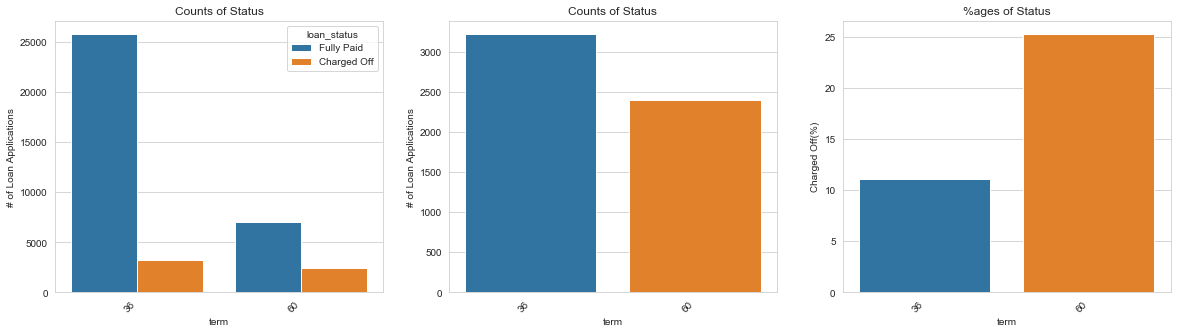

In [58]:
fig = plt.figure(figsize=(20, 5), )

plt.subplot(1, 3, 1)
ax=sns.countplot(x="term", hue="loan_status", data=dataset, linewidth=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")

plt.subplot(1, 3, 2)
ax=sns.countplot(x="term", data=dataset[dataset.loan_status=="Charged Off"], linewidth=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Counts of Status")
plt.ylabel("# of Loan Applications")


plt.subplot(1, 3, 3)
ax=sns.barplot(x="term", y="Charged_Off_Percent", data=term_status)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("%ages of Status")
plt.ylabel('Charged Off(%)')


plt.show()

___Conclusion:___
- The above plots clearly states that `Higher term ie 60 months` applicants defaults more as there is not much differences in the percentage ranges

# finalized till here

### Univariate Analysis - Quantitative Variables

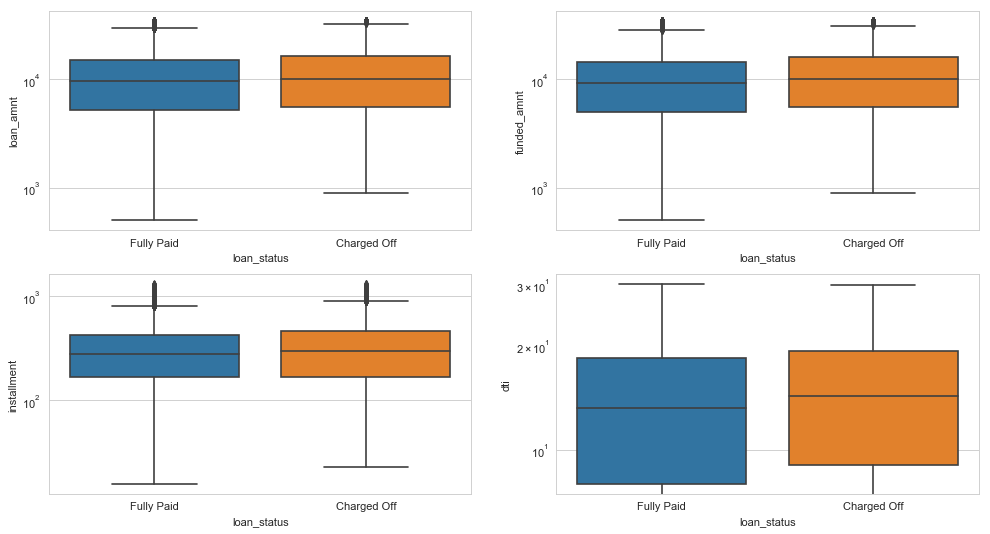

In [59]:
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plt.yscale("log")
sns.boxplot(x='loan_status', y='loan_amnt', data=dataset)

plt.subplot(2, 2, 2)
plt.yscale("log")
sns.boxplot(x='loan_status', y='funded_amnt', data=dataset)

plt.subplot(2, 2, 3)
plt.yscale("log")
sns.boxplot(x='loan_status', y='installment', data=dataset)

plt.subplot(2, 2, 4)
plt.yscale("log")
sns.boxplot(x='loan_status', y='dti', data=dataset)


plt.show()

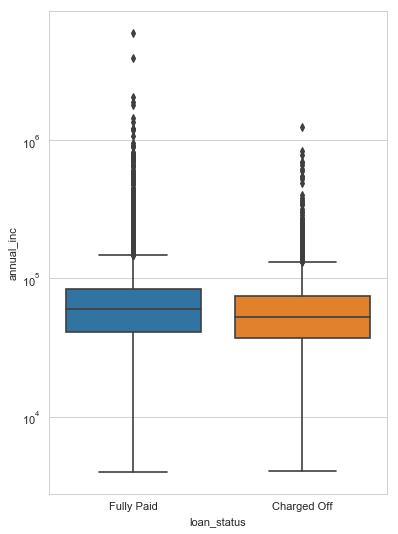

In [60]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 2, 1)
plt.yscale("log")
sns.boxplot(x='loan_status', y='annual_inc', data=dataset)

plt.show()

In [61]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.0,RENT,30000.0,Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Verified,Dec-11,Current,other,OR,17.94,0.0


# Rough work

In [62]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

In [63]:
pair_test_df = dataset[
    ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 
     'term', 'int_rate', 'installment', 'emp_length', 
     'annual_inc', 'dti', 'pub_rec_bankruptcies',
    'loan_status']
]

In [64]:
cor = pair_test_df[pair_test_df.loan_status=='Charged Off'].corr()
round(cor, 3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies
loan_amnt,1.000,0.979,0.907,0.389,0.351,0.926,0.192,0.352,0.064,-0.028
funded_amnt,0.979,1.000,0.927,0.373,0.354,0.954,0.195,0.347,0.061,-0.033
funded_amnt_inv,0.907,0.927,1.000,0.422,0.370,0.858,0.200,0.315,0.073,-0.029
term,0.389,0.373,0.422,1.000,0.456,0.134,0.141,0.079,0.064,0.022
int_rate,0.351,0.354,0.370,0.456,1.000,0.328,0.047,0.132,0.041,0.078
installment,0.926,0.954,0.858,0.134,0.328,1.000,0.163,0.359,0.042,-0.027
emp_length,0.192,0.195,0.200,0.141,0.047,0.163,1.000,0.139,0.056,0.049
annual_inc,0.352,0.347,0.315,0.079,0.132,0.359,0.139,1.000,-0.090,-0.005
dti,0.064,0.061,0.073,0.064,0.041,0.042,0.056,-0.090,1.000,0.020
pub_rec_bankruptcies,-0.028,-0.033,-0.029,0.022,0.078,-0.027,0.049,-0.005,0.020,1.000


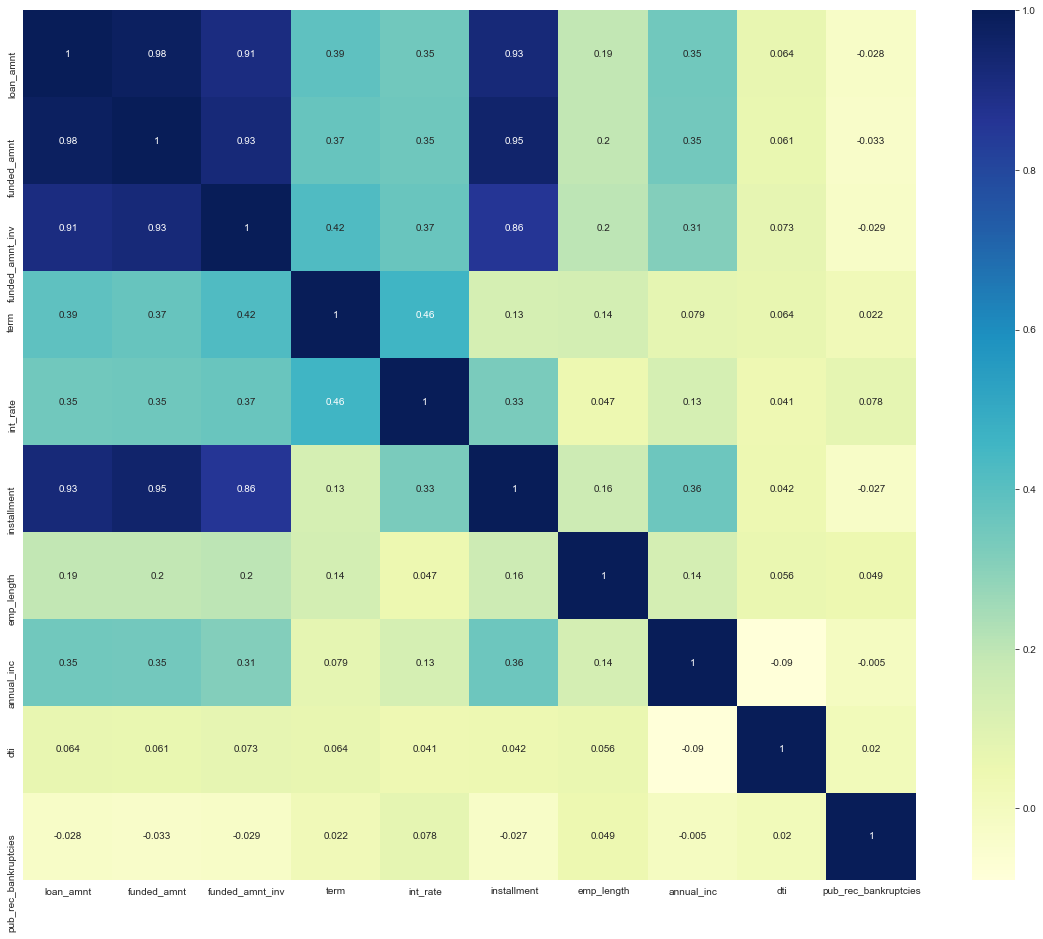

In [65]:
plt.figure(figsize=(20,16))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

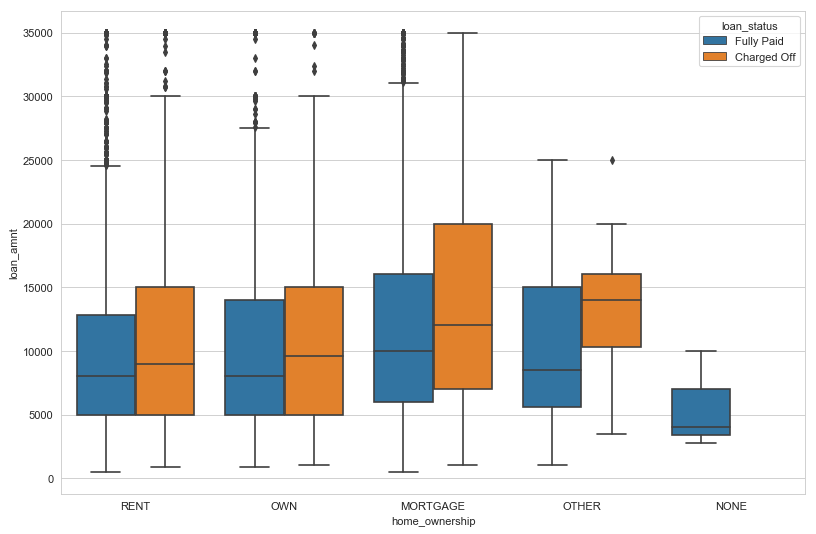

In [66]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.boxplot(x='home_ownership', y='loan_amnt', hue="loan_status", data=dataset)
plt.show()

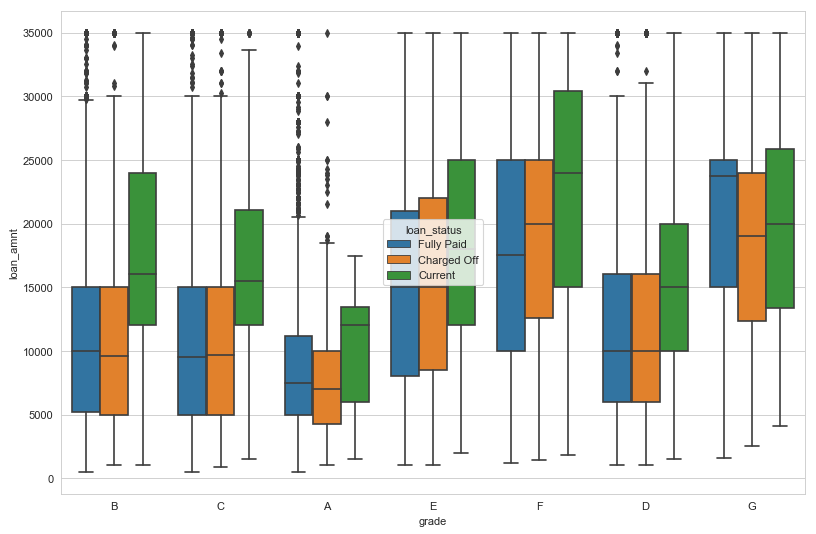

In [67]:
# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.boxplot(x='grade', y='loan_amnt', hue="loan_status", data=df)
plt.show()

## Some rough work here

In [ ]:
df.loan_status.value_counts()

In [ ]:
dataset.loan_amnt.quantile(0.95)

In [ ]:
plt.yscale("log")
sns.boxplot(y='loan_amnt', x='loan_status', data=dataset[dataset.loan_amnt<=25000.0])
plt.show()

In [ ]:
sns.distplot(df.loan_amnt)
plt.show()

In [ ]:
plt.hist(df.loan_amnt)

In [ ]:
sns.barplot(y='emp_length', x='loan_status', data=df, estimator=np.mean)

In [ ]:
df[['loan_status', 'purpose', 'dti']].sort_values(by='dti')

In [ ]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()